<a href="https://colab.research.google.com/github/Jeetkavaiya/CodeClauseInternship_Employee-Attrition-Prediction/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Prediction Of Employee Attrition

## Import the dataset from kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kmldas/hr-employee-data-descriptive-analytics

Dataset URL: https://www.kaggle.com/datasets/kmldas/hr-employee-data-descriptive-analytics
License(s): copyright-authors
hr-employee-data-descriptive-analytics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/hr-employee-data-descriptive-analytics.zip','r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/hr-employee-data-descriptive-analytics.zip' mode='r'>>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/HR_Employee_Data.xlsx')

In [ ]:
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 11)

In [ ]:
df.columns

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
df = df.rename(columns={'average_montly_hours':'average_monthly_hours'})

In [ ]:
df = df.drop(['Emp_Id'], axis='columns')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
df.duplicated(keep='first').sum()

3008

## EDA

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df["average_monthly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [ ]:
bins = len(df["average_monthly_hours"].unique())
bins

215

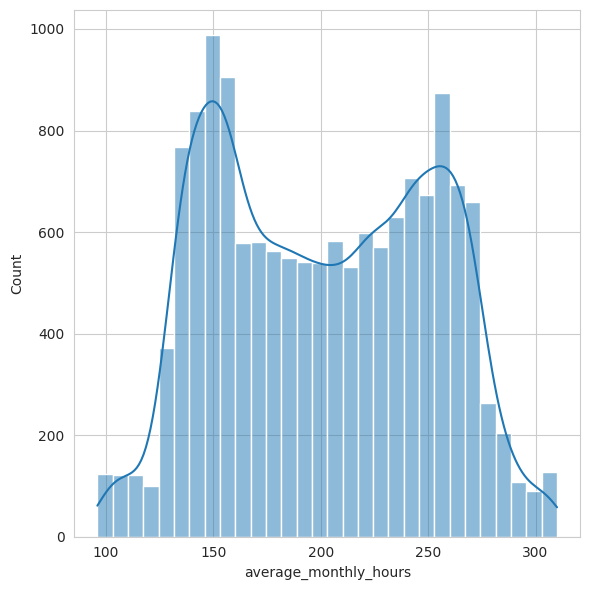

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(data = df, x = df["average_monthly_hours"], kde=True)
plt.tight_layout()
plt.show()

### Number of projects

In [ ]:
df['number_project'].value_counts()

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

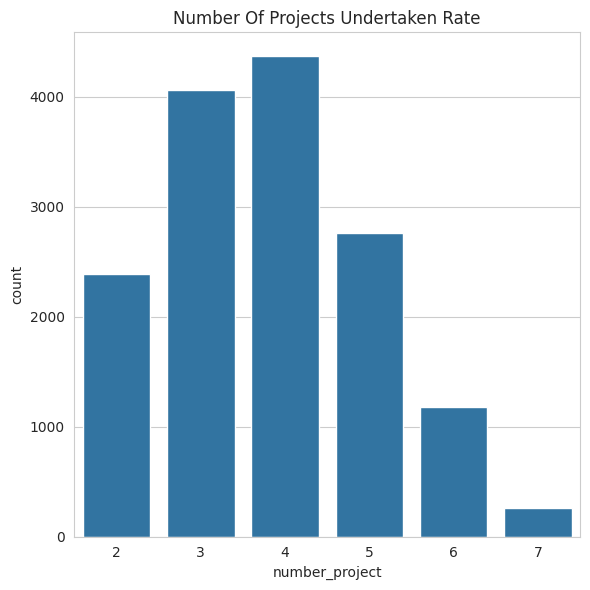

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="number_project")
plt.title("Number Of Projects Undertaken Rate")
plt.tight_layout()
plt.show()

### Promotion Made In The Last 5 Years

In [ ]:
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [ ]:
labels = df["promotion_last_5years"].value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = ["Promoted" if i == 1 else "Not Promoted" for i in labels]
labels

['Not Promoted', 'Promoted']

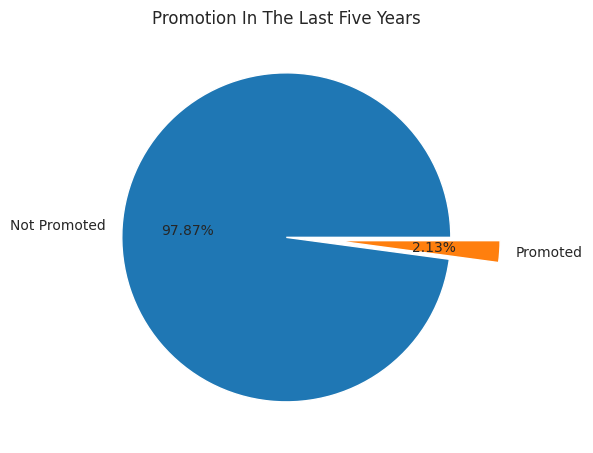

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(x = df["promotion_last_5years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years")
plt.tight_layout()
plt.show()

### Work Accident

In [ ]:
df['Work_accident'].value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [ ]:
labels = df["Work_accident"].value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = ["Work Accident" if i == 1 else "No Work Accident" for i in labels]
labels

['No Work Accident', 'Work Accident']

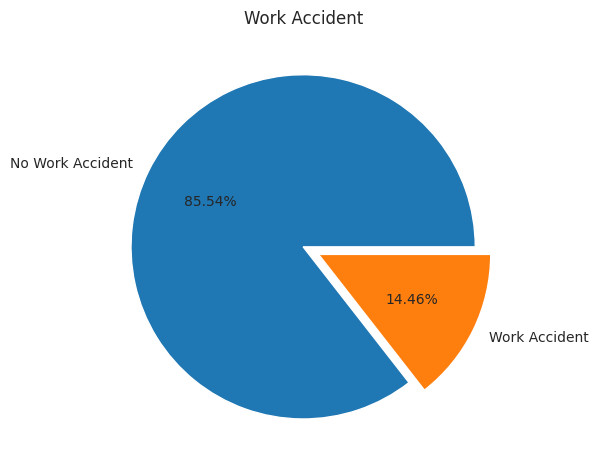

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(x = df["Work_accident"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Work Accident")
plt.tight_layout()
plt.show()

### Time Spent in Company

In [ ]:
df['time_spend_company'].value_counts()

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

In [ ]:
labels = df['time_spend_company'].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

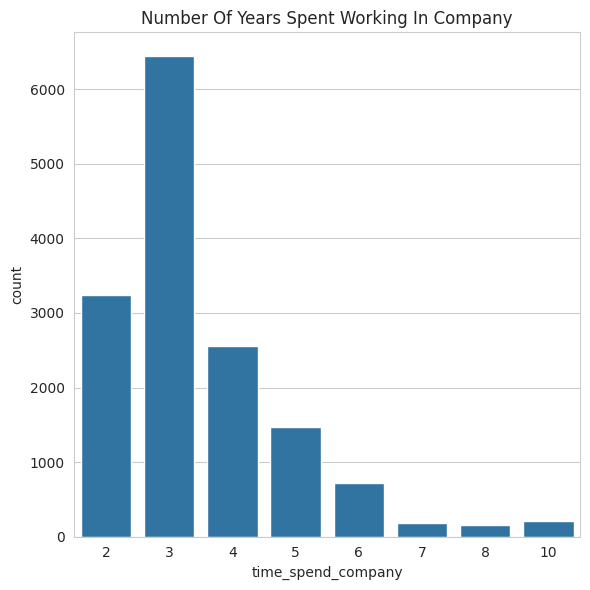

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "time_spend_company", data=df)
plt.title("Number Of Years Spent Working In Company")
plt.tight_layout()
plt.show()

In [ ]:
df["time_spend_company"].mean()

3.498233215547703

### Department

In [ ]:
df['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

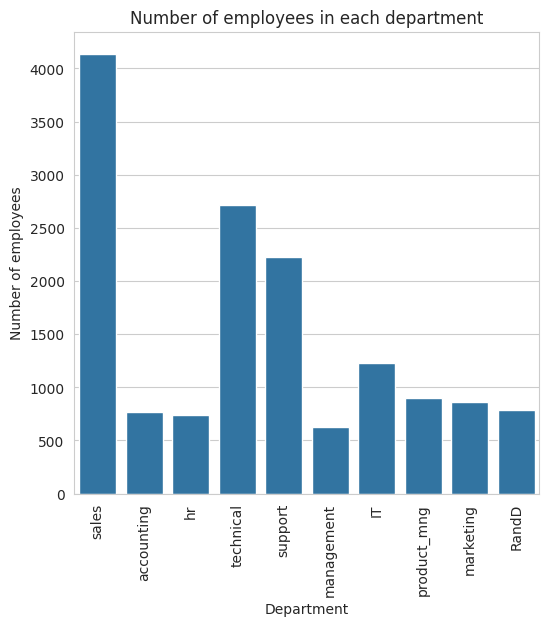

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "Department", data=df)
plt.title("Number of employees in each department")
plt.xlabel("Department")
plt.ylabel("Number of employees")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [ ]:
labels = df['salary'].value_counts().index.tolist()
labels

['low', 'medium', 'high']

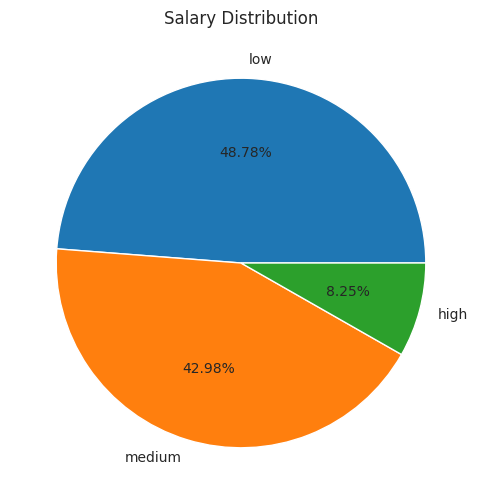

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(x = df['salary'].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Distribution")
plt.show()

## Categorical Encoding

In [ ]:
categorical_cols = ["Department", "salary"]
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="cat")

In [ ]:
encoded_cols

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,True,False,False,True,False
14995,False,False,False,False,False,False,False,False,True,False,False,True,False
14996,False,False,False,False,False,False,False,False,True,False,False,True,False
14997,False,False,False,False,False,False,False,False,True,False,False,True,False


In [ ]:
df = df.join(encoded_cols)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
df = df.drop(['Department', 'salary'], axis='columns')

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')

### Min-Max scaling

In [ ]:
df["average_monthly_hours"].min()

96

In [ ]:
df["average_monthly_hours"].max()

310

### Train Test Split

In [ ]:
X = df.drop("left", axis=1)
y = df["left"]

In [ ]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
X_train.shape

(11999, 20)

In [ ]:
X_test.shape

(3000, 20)

## Train the model

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8013333333333333

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2297
           1       0.62      0.39      0.48       703

    accuracy                           0.80      3000
   macro avg       0.73      0.66      0.68      3000
weighted avg       0.78      0.80      0.78      3000



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2131,  166],
       [ 430,  273]])

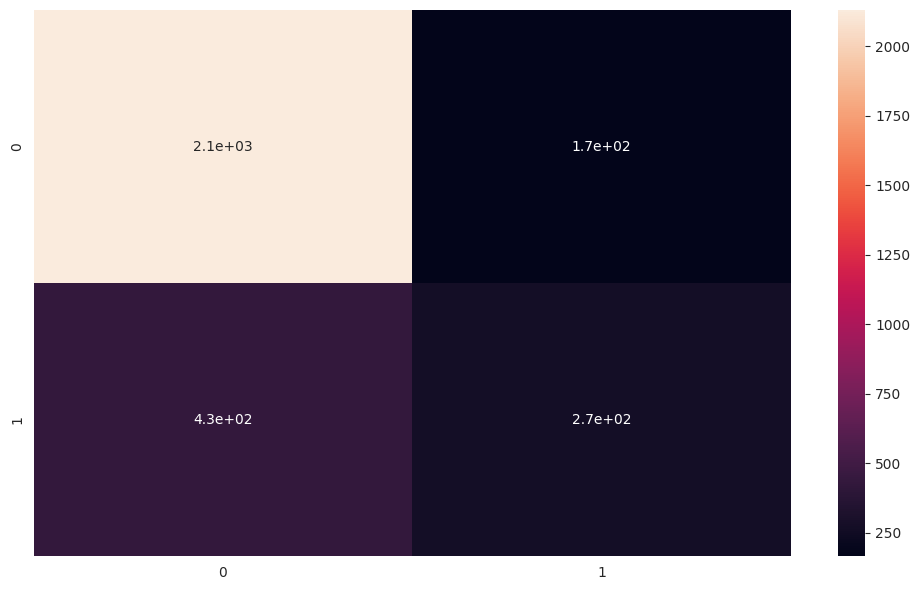

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.991

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2297
           1       1.00      0.97      0.98       703

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
cm = confusion_matrix(y_test, rf_pred)
cm

array([[2294,    3],
       [  24,  679]])

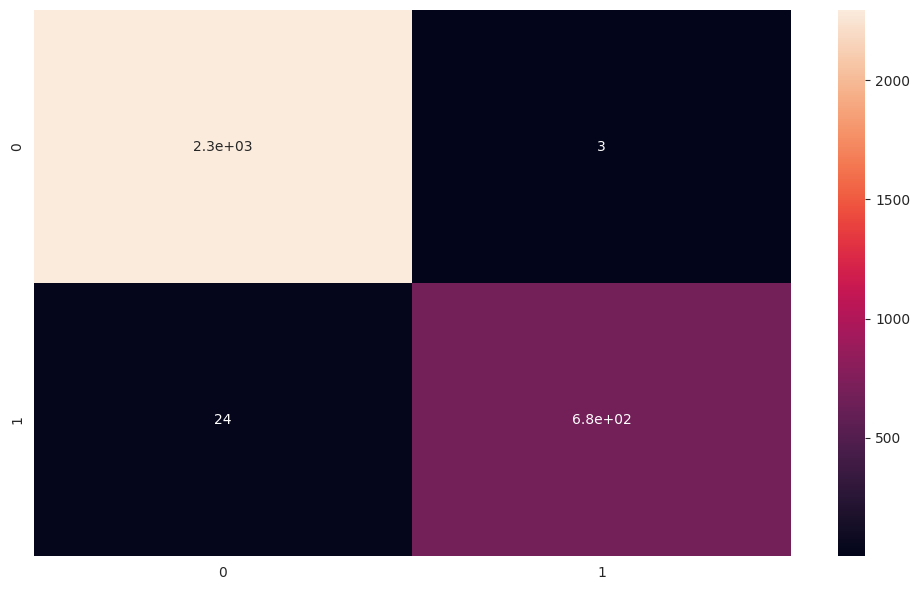

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
parameter = {
    'criterion': ["gini", "entropy"],
    "n_estimators": [10, 100, 150, 200],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"]
}

In [ ]:
kfold = StratifiedKFold(n_splits=5)

In [ ]:
clf = GridSearchCV(rf, parameter, scoring="accuracy", n_jobs=2, cv=kfold)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
clf.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': 2,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'n_estimators': [10, 100, 150, 200],
  'min_samples_leaf': [1, 2, 4, 6],
  'max_features': ['auto', 'sqrt', 'log2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 '

In [ ]:
clf.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [ ]:
clf.best_score_

0.9884988884257331

In [ ]:
clf.score(X_test, y_test)

0.9903333333333333

## Save Model

In [ ]:
import pickle

In [ ]:
with open("model.pkl", "wb") as model_file:
  pickle.dump(clf, model_file)